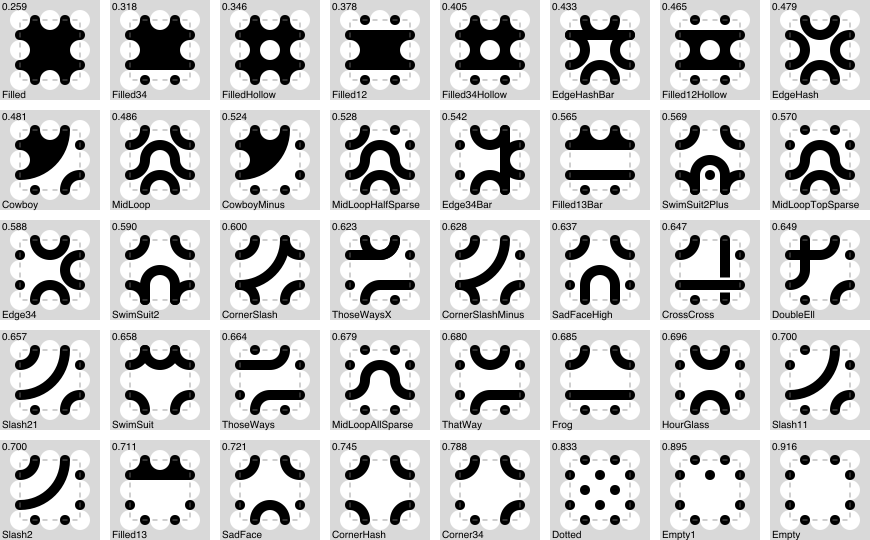

In [1]:
from tiler import show_tiles, multiscale_truchet
from n6 import *
show_tiles(n6_tiles, with_value=True, with_name=True, only_one=True, size=100, width=900)

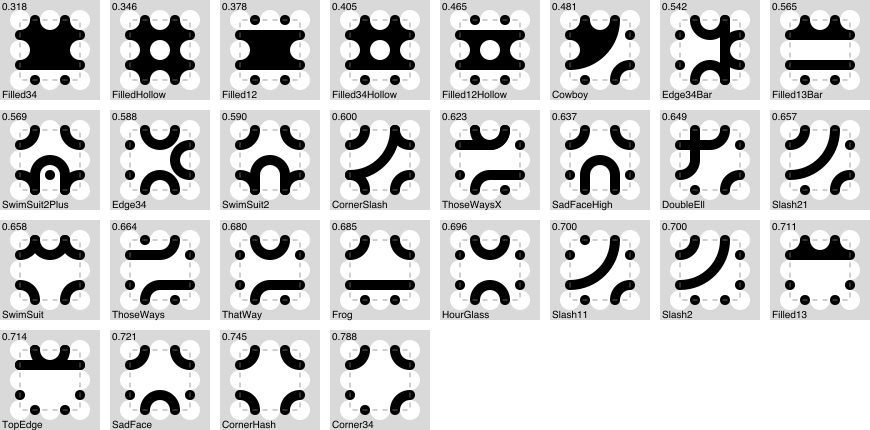

In [2]:
show_tiles(n6_circles, with_value=True, with_name=True, only_one=True, size=100, width=900)

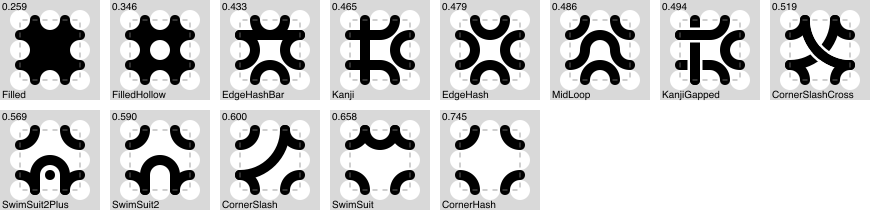

In [3]:
show_tiles(n6_connected, with_value=True, with_name=True, only_one=True, size=100, width=900)

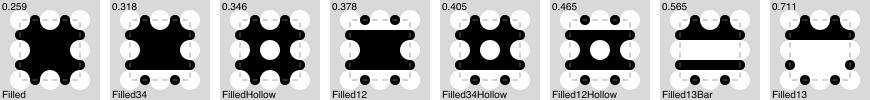

In [4]:
show_tiles(n6_filled, with_value=True, with_name=True, only_one=True, size=100, width=1200)

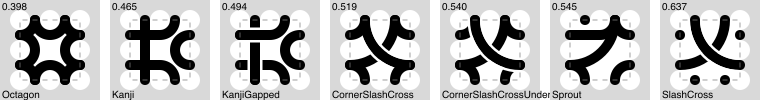

In [5]:
show_tiles(n6_weird, with_value=True, with_name=True, only_one=True, size=100, width=1200)

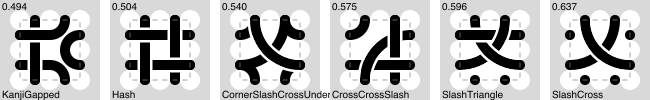

In [6]:
show_tiles(n6_lattice, with_value=True, with_name=True, only_one=True, size=100, width=1200)

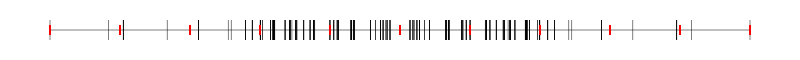

In [7]:
from tiler import value_chart
value_chart(n6_tiles, inverted=True)

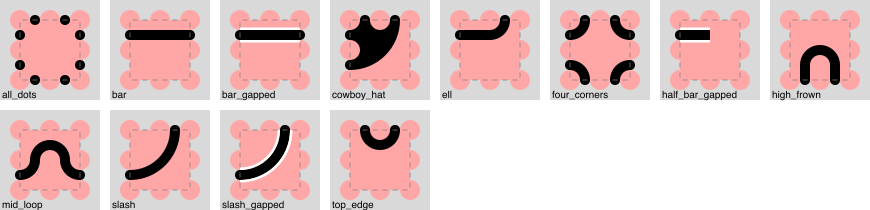

In [8]:
show_tiles(n6_strokes, with_name=True)

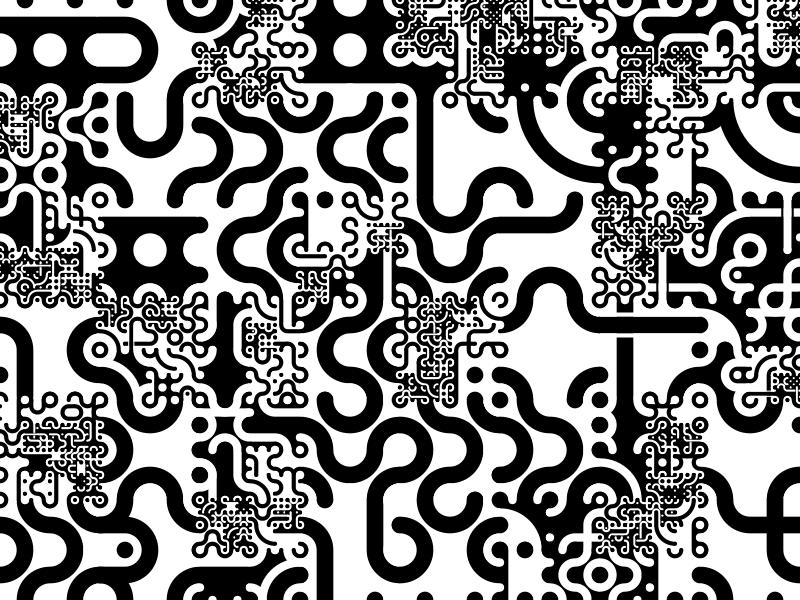

In [9]:
multiscale_truchet(tiles=n6_tiles, width=800, height=600, tilew=100, nlayers=4, chance=.45, grid=False, seed=18)

In [10]:
multiscale_truchet(
    tiles=n6_circles, width=2160, height=3840, tilew=240, nlayers=4, chance=.4, bg="#335495", fg="#243b6a", 
    format="png", output="~/wallpaper/tru6.png",
)

In [11]:
multiscale_truchet(
    tiles=n6_circles, width=2872, height=5108, tilew=300, nlayers=3, chance=.4, bg="#335495", fg="#243b6a", 
    format="png", output="~/wallpaper/tru6_large.png",
)

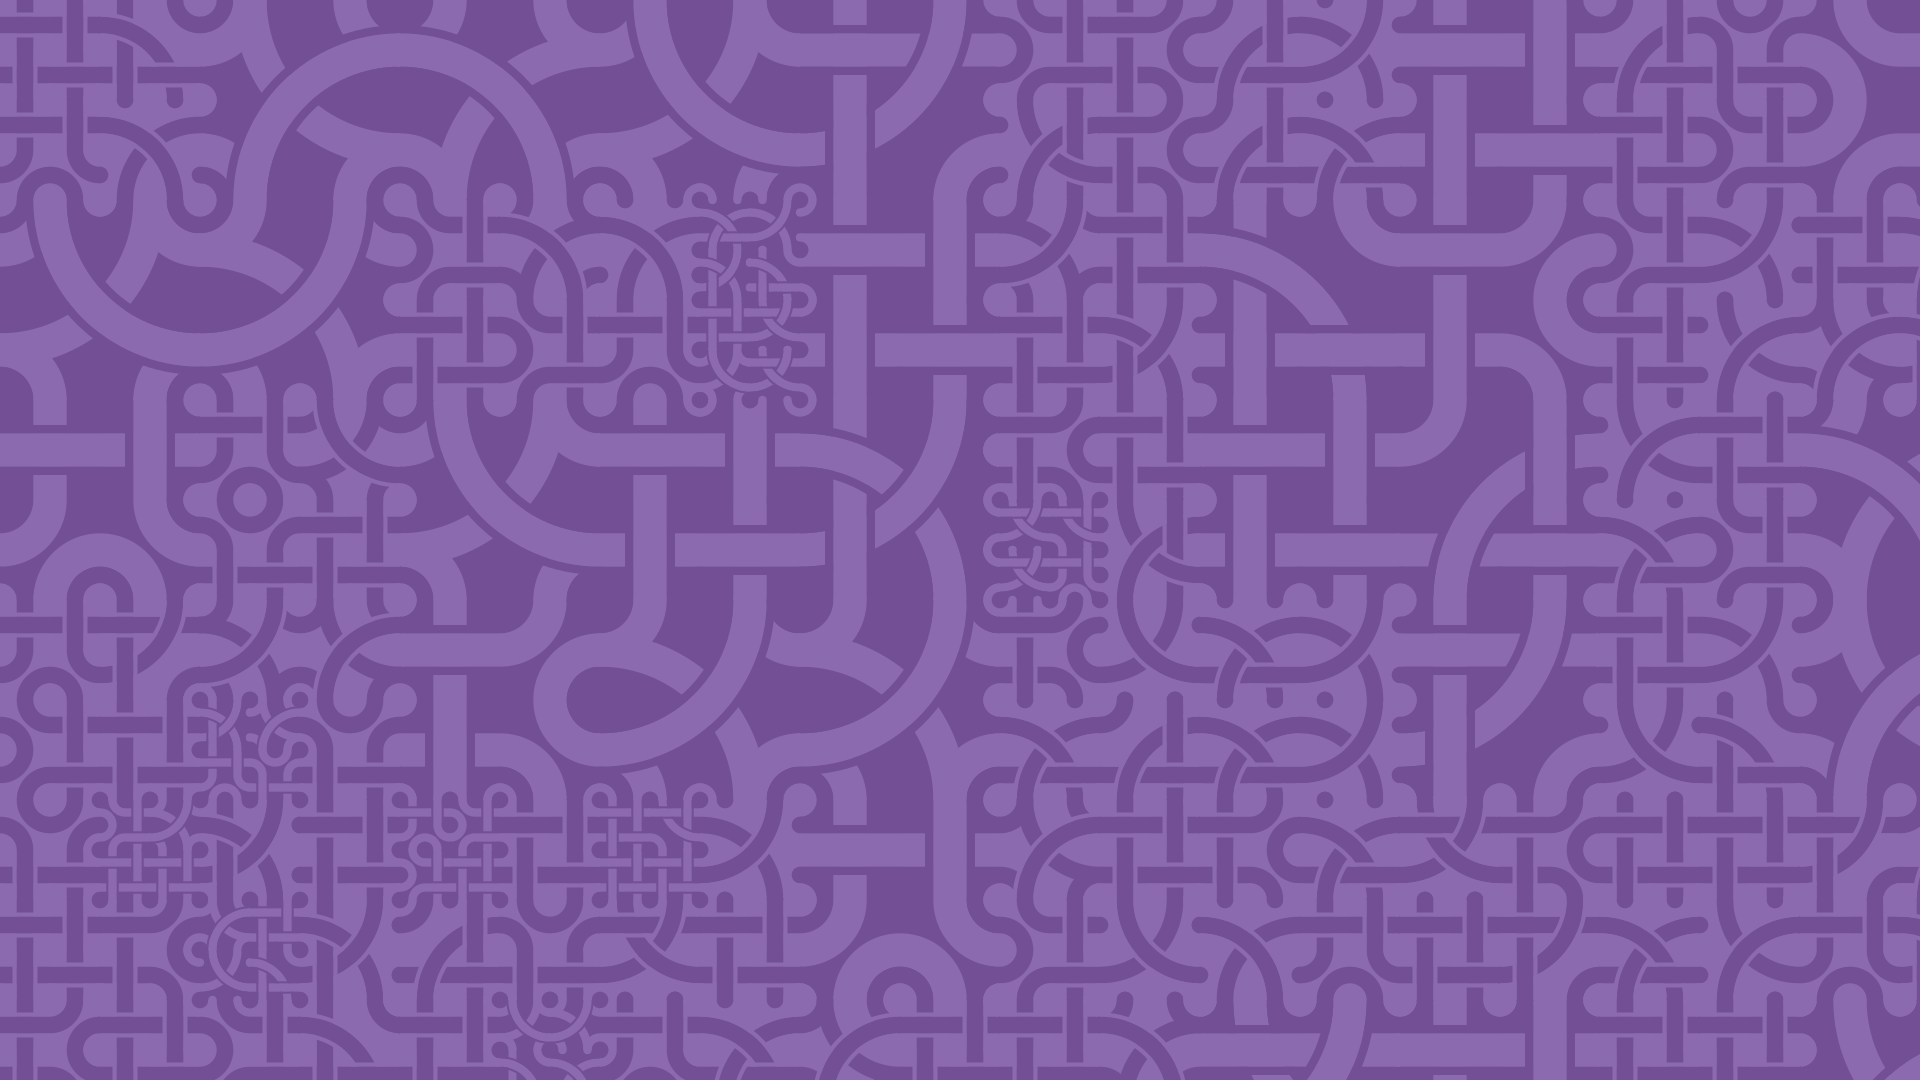

In [12]:
from helpers import make_bgfg
if 0:
    for seed in range(100):
        multiscale_truchet(
            tiles=n6_lattice, width=1920, height=1080, tilew=400, nlayers=3, 
            chance=(lambda x, y, size, ilayer: [.9, .5][ilayer]), 
            seed=seed, **make_bgfg((.35), (.50, .45), (.3)), format="png",
            output=f"/dwn/zoomy/truchet_{seed:02d}.png",
        )

multiscale_truchet(
        tiles=n6_lattice, width=1920, height=1080, tilew=400, nlayers=5, 
        chance=(lambda x, y, size, ilayer: [.9, .5, .1, .1][ilayer]), 
        seed=102, **make_bgfg((.75), (.55, .45), (.3)), format="png",
    )

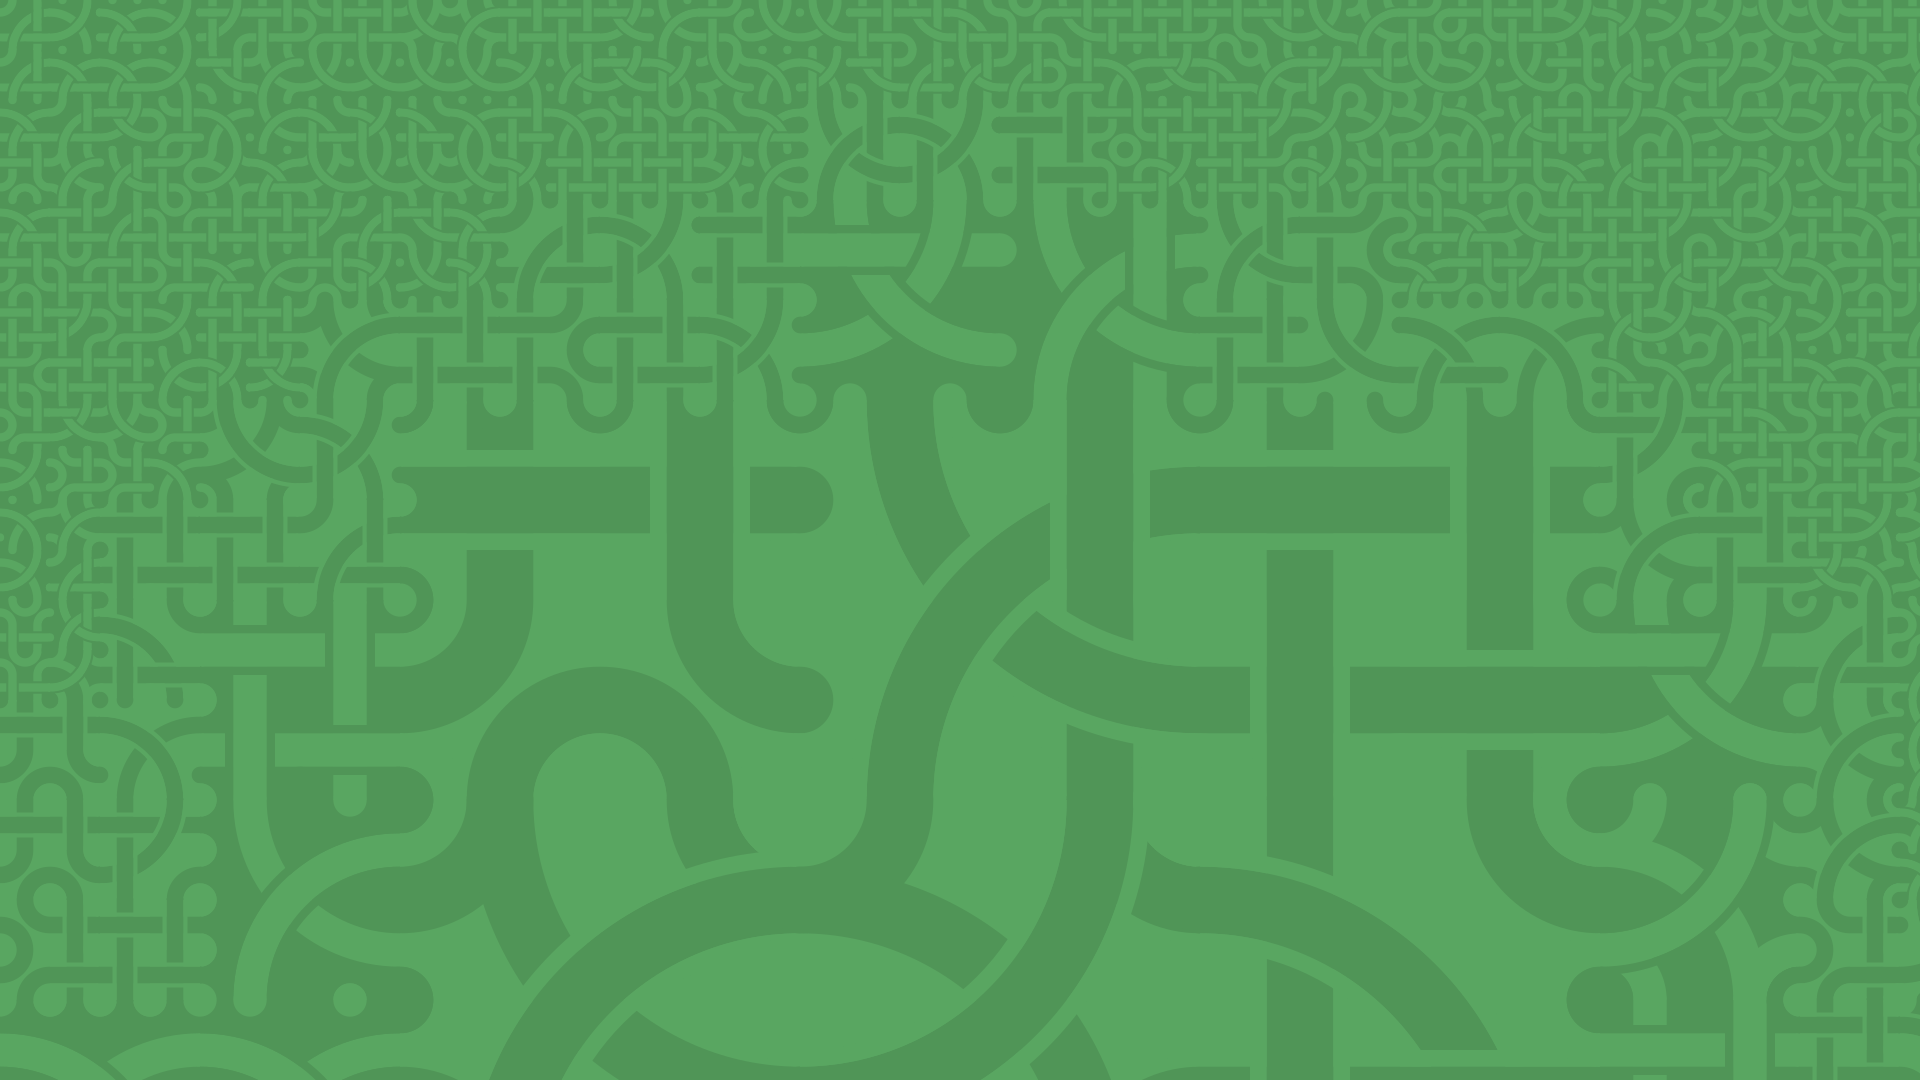

In [13]:
from math import sqrt
def ring_chance(x, y, size, ilayer):
    dist_from_center = abs(x - .5) + abs(y - .5)
    thresh = [.5, .6, .7, .8][ilayer]
    return float(dist_from_center > thresh)

def arch_distance(x, y):
    return sqrt(((x - .5)/.75)**2 + ((y - 1)/1.25)**2)

def arch_chance(x, y, size, ilayer):
    thresh = [.5, .6, .7, .8][ilayer]
    return float(arch_distance(x, y) > thresh)
    
multiscale_truchet(
    tiles=n6_lattice, width=1920, height=1080, tilew=400, nlayers=4, 
    chance=arch_chance, 
    seed=102, **make_bgfg((.35), (.50, .45), (.3)), format="png",
    #output="/dwn/zoomarch_truchet.png",        
)

In [14]:
import random
def tile_chooser(ux, uy, uw, ilayer):
    dist = arch_distance(ux, uy)
    tiles = n6_lattice if dist < .88 else n6_circles
    return random.choice(tiles)

multiscale_truchet(
    tile_chooser=tile_chooser, 
    width=1920, height=1080, tilew=400, nlayers=4, 
    chance=arch_chance,
    **make_bgfg((.40), (.50, .45), (.3)), seed=18, format="png", 
    output="/dwn/zoom.png",
)